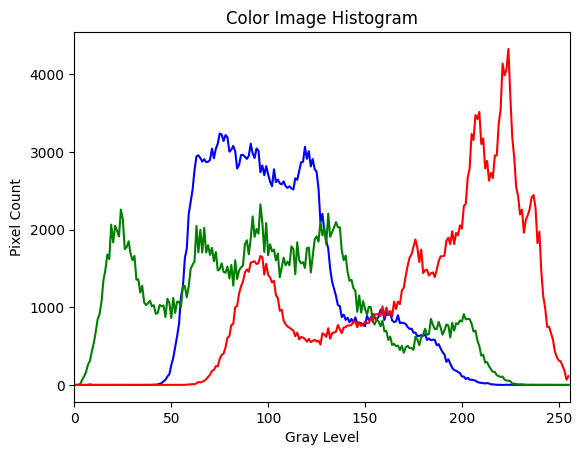

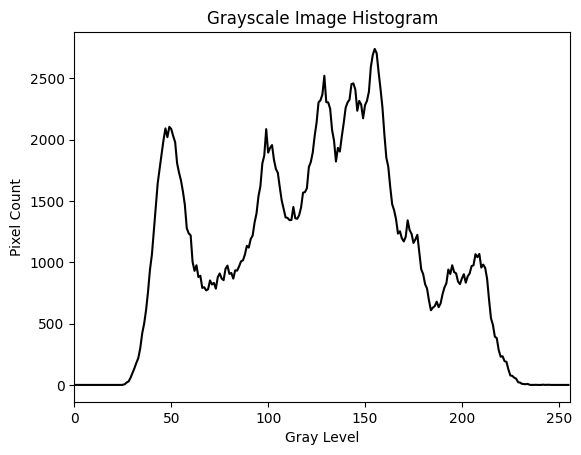

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

image = "lena.jpg"

def compute_histogram(image):
    if len(image.shape) == 2:  # Grayscale image
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        return hist
    else:  # Color image
        colors = ('b', 'g', 'r')
        hist = {c: cv2.calcHist([image], [i], None, [256], [0, 256]) for i, c in enumerate(colors)}
        return hist

def plot_histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Gray Level")
    plt.ylabel("Pixel Count")

    if isinstance(hist, dict):  # Color image
        for c, h in hist.items():
            plt.plot(h, color=c)
    else:  # Grayscale image
        plt.plot(hist, color='black')

    plt.xlim([0, 256])
    plt.show()

def analyze_histogram(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    color_hist = compute_histogram(image)
    gray_hist = compute_histogram(gray)

    plot_histogram(color_hist, "Color Image Histogram")
    plot_histogram(gray_hist, "Grayscale Image Histogram")

analyze_histogram(image)

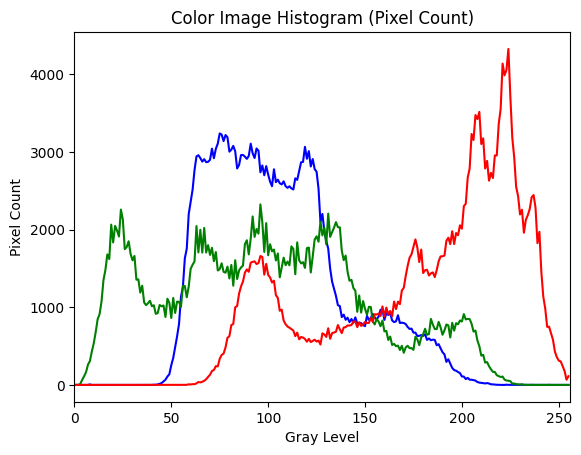

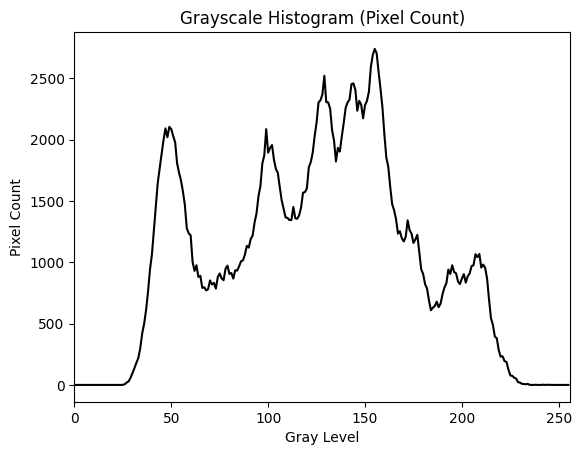

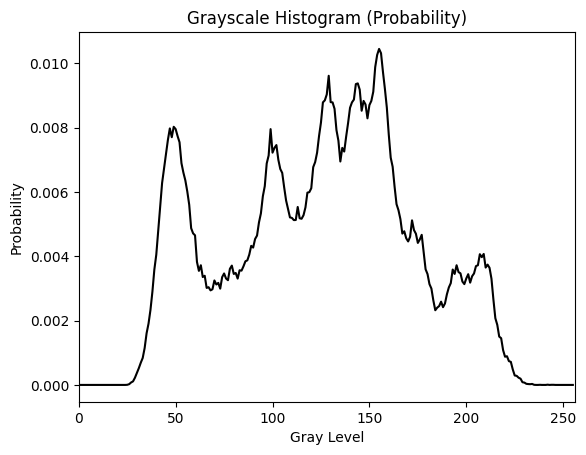

In [20]:
def compute_histogram(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return hist

def plot_histogram(hist, title, mode='count'):
    plt.figure()
    plt.title(title)
    plt.xlabel("Gray Level")
    plt.ylabel("Pixel Count" if mode == 'count' else "Probability")

    if mode == 'probability':
        hist /= hist.sum()

    plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.show()

def visualize_histogram(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    color_hist = {c: cv2.calcHist([image], [i], None, [256], [0, 256]) for i, c in enumerate(('b', 'g', 'r'))}
    gray_hist = compute_histogram(gray)

    plt.figure()
    plt.title("Color Image Histogram (Pixel Count)")
    plt.xlabel("Gray Level")
    plt.ylabel("Pixel Count")
    for c, h in color_hist.items():
        plt.plot(h, color=c)
    plt.xlim([0, 256])
    plt.show()

    plot_histogram(gray_hist, "Grayscale Histogram (Pixel Count)", mode='count')
    plot_histogram(gray_hist, "Grayscale Histogram (Probability)", mode='probability')

visualize_histogram(image)

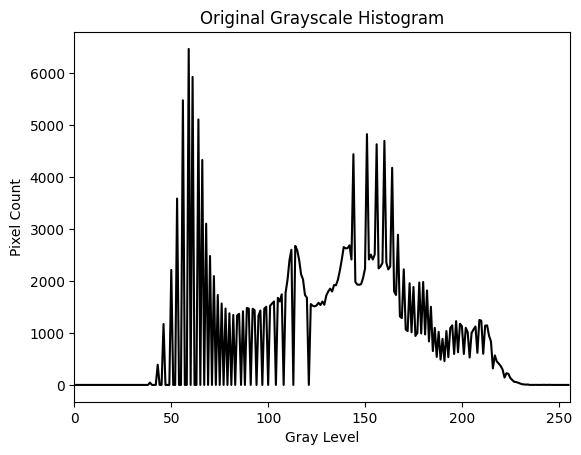

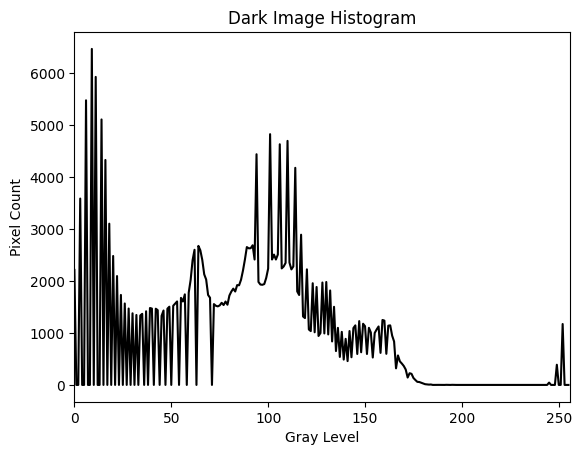

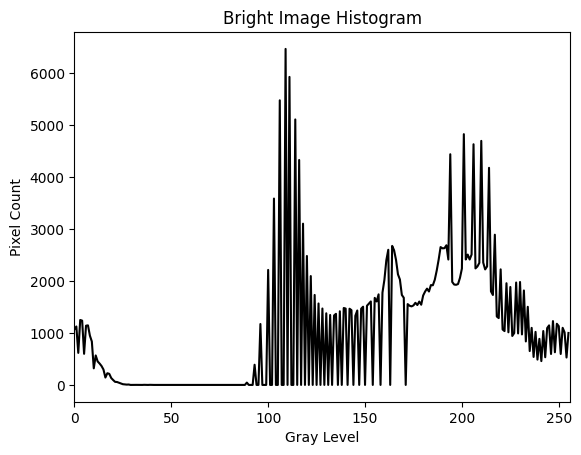

In [21]:

def compute_histogram(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return hist

def plot_histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Gray Level")
    plt.ylabel("Pixel Count")
    plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.show()

def observe_brightness_changes(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    dark_image = np.clip(image - 50, 0, 255).astype(np.uint8)
    bright_image = np.clip(image + 50, 0, 255).astype(np.uint8)

    original_hist = compute_histogram(image)
    dark_hist = compute_histogram(dark_image)
    bright_hist = compute_histogram(bright_image)

    plot_histogram(original_hist, "Original Grayscale Histogram")
    plot_histogram(dark_hist, "Dark Image Histogram")
    plot_histogram(bright_hist, "Bright Image Histogram")

observe_brightness_changes(image)


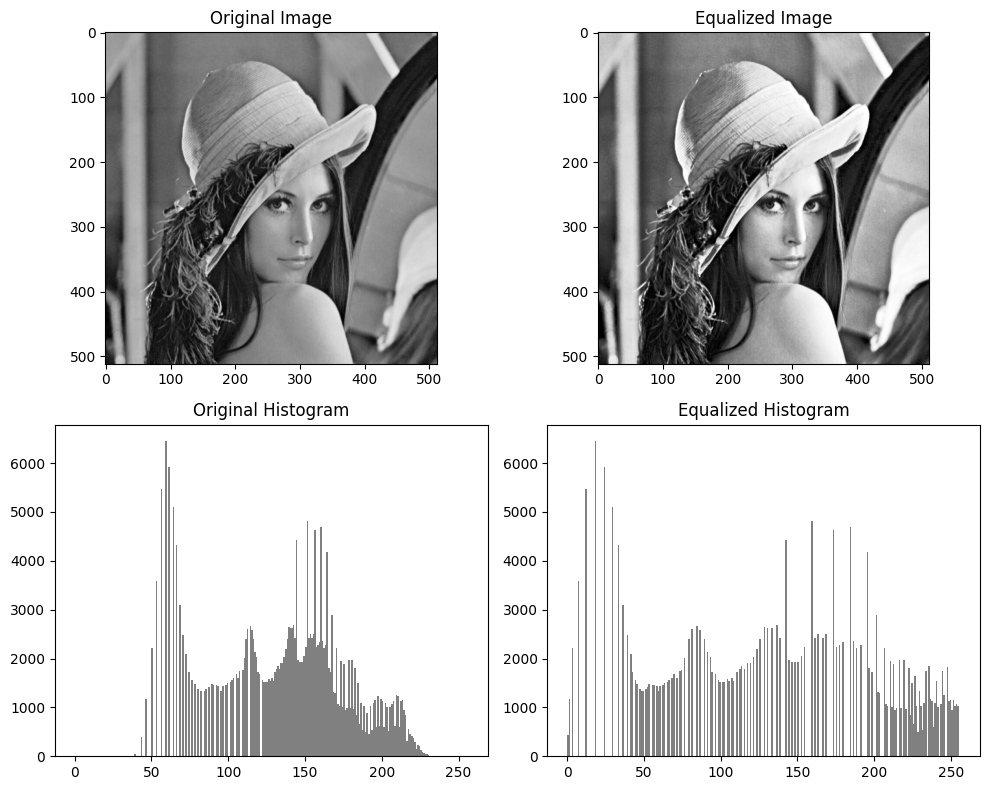

In [22]:
import warnings
warnings.filterwarnings("ignore")
def histogram_equalization_cv2(image_path):
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        flat_img = img.flatten()
        histogram, bins = np.histogram(flat_img, 256, [0, 256])
        cdf = histogram.cumsum()
        cdf_normalized = (cdf * 255) / cdf[-1]
        lut = cdf_normalized.astype(np.uint8)
        equalized_flat_img = lut[flat_img]
        equalized_img = equalized_flat_img.reshape(img.shape)
        fig, axs = plt.subplots(2, 2, figsize=(10, 8))

        axs[0, 0].imshow(img, cmap='gray')
        axs[0, 0].set_title("Original Image")
        axs[0, 1].imshow(equalized_img, cmap='gray')
        axs[0, 1].set_title("Equalized Image")

        axs[1, 0].hist(flat_img, 256, [0, 256], color='gray')
        axs[1, 0].set_title("Original Histogram")
        axs[1, 1].hist(equalized_flat_img, 256, [0, 256], color='gray')
        axs[1, 1].set_title("Equalized Histogram")

        plt.tight_layout()
        plt.show()

        return equalized_img

equalized_image = histogram_equalization_cv2(image)

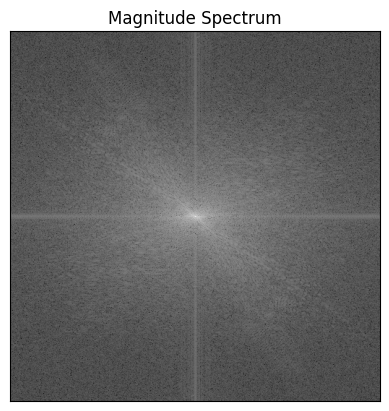

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_magnitude_spectrum(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.xticks([]), plt.yticks([])
    plt.show()
    return magnitude_spectrum

display_magnitude_spectrum(image)

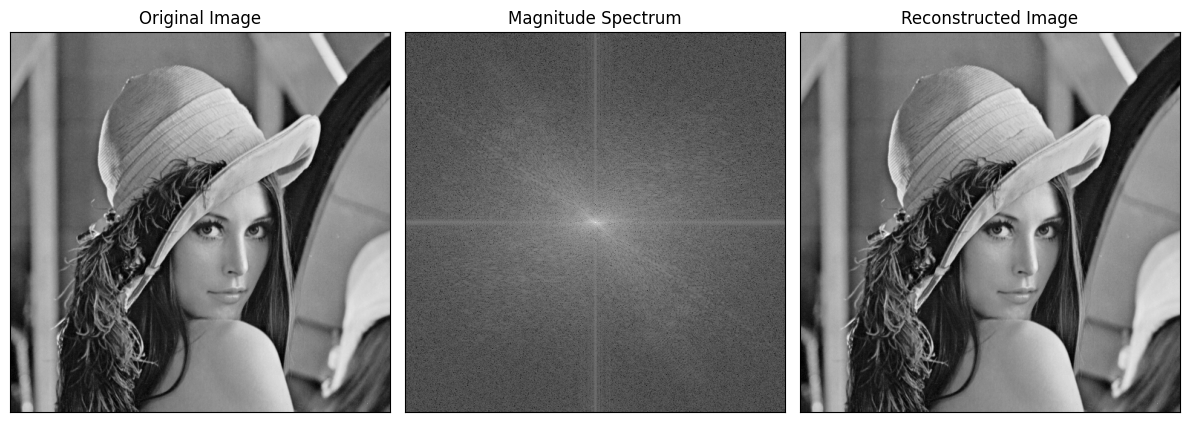

In [27]:
def reconstruct_image(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    img_back = img_back.astype(np.uint8)  # Important for correct image display

    plt.figure(figsize=(12, 6))
    plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(img_back, cmap='gray'), plt.title('Reconstructed Image')
    plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

reconstruct_image(image)

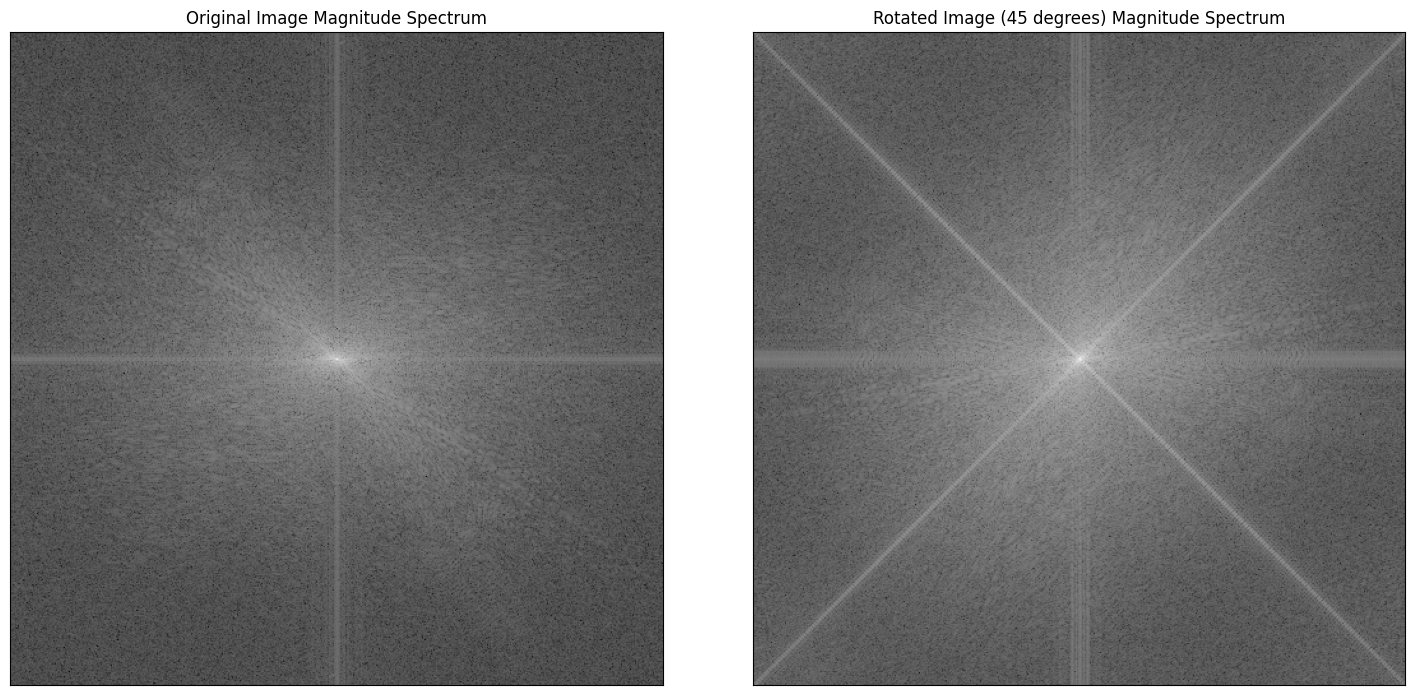

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def verify_rotation_property(image_path, angle):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    f_original = np.fft.fft2(img)
    fshift_original = np.fft.fftshift(f_original)
    magnitude_spectrum_original = 20*np.log(np.abs(fshift_original))

    rows, cols = img.shape
    center = (cols/2, rows/2)
    M = cv2.getRotationMatrix2D(center, angle, 1)  # Rotation matrix
    rotated_img = cv2.warpAffine(img, M, (cols, rows))

    f_rotated = np.fft.fft2(rotated_img)
    fshift_rotated = np.fft.fftshift(f_rotated)
    magnitude_spectrum_rotated = 20*np.log(np.abs(fshift_rotated))

    plt.figure(figsize=(15, 7))

    plt.subplot(121), plt.imshow(magnitude_spectrum_original, cmap='gray')
    plt.title('Original Image Magnitude Spectrum')
    plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(magnitude_spectrum_rotated, cmap='gray')
    plt.title(f'Rotated Image ({angle} degrees) Magnitude Spectrum')
    plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.show()

angle_of_rotation = 45
verify_rotation_property(image, angle_of_rotation)